# Project Title: Predicting Insurance Charges using Linear Regression

This project involves predicting insurance charges based on BMI, age, gender, and smoking habits using multiple linear regression. The dataset includes diverse features, making it suitable for regression analysis. The model achieved an R² value of 74.17%, indicating a moderate to good fit. Tools used include Pandas, NumPy, Matplotlib, Seaborn, and Sklearn. The project demonstrates comprehensive data cleaning, exploratory data analysis, data visualization, and model evaluation techniques.

 <b>Step One: importing all libraries to be used in assignment<b>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

<b>Step Two: load data (CSV file) into pandas dataframe.<b>

In [2]:
df= pd.read_csv('insurance.csv')

<b> Step Three: Completing Exploratory Data Analysis (EDA). EDA is important for data analysis, it helps visualize the data, summarize the data, check what the data entails. EDA often employs statistical analysis as well, this statistical analysis helps analyst understand if the data has no variation, if the data has no outliers any anomalies and how the data is distributed.<b> 

In [3]:
#Viewing the first 5 columns of dataset to check if the data was loaded correctly.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


From the first 5 rows we can already see that we have 3 categorical variables and 4 numerical variables. 

In [4]:
#Checking the size of the data.
df.shape

(1338, 7)

This dataset has 1338 columns and 7 rows. 

In [5]:
# Checking the data types of each column in pandas dataframe, noted that the data set has categorical (object) data and this needs to be converted to numerical data.
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataset types show us the various data types, this links to the data set having 3 categorical (objects) variables and 4 numerical (int64, float) variables we had noticed on previous code. Changes to convert categorical variables to numeric ones will have to be made before performing linear regression.

In [6]:
#Counting the number(sum) of missing values(isnull)
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This shows that the dataset has no null (missing) values.

In [7]:
#Counting the number(sum) of missing values(isna) usually expressed as NaN.
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This shows that the dataset has no NaN (missing) values. 

In [8]:
#Viewing descriptive statistics of dataframe (df.describe()), the round (2) is used to round the output to two decimal places, the T is to transpose the dataframe so that the rows become column names and vice versa.
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


 The 'age' variable shows a fairly wide range with a mean near the middle, suggesting a fairly uniform age distribution among participants.
 'BMI' indicates an average above the normal range, hinting at overweight issues within the population studied.
 The 'children' variable suggests that a significant portion of the dataset's individuals have few to no children, with a mean slightly above 1.
 'Charges' display a wide range and a significant standard deviation.


<b> Step Four: Visualising independent variables individually with dependent variable, charges. To check if there is any relationship. <b>

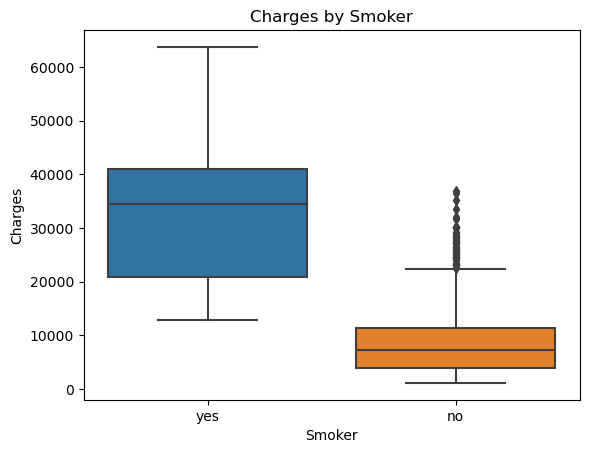

In [9]:
#Box plot of charges by smokers
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

From the box plot above we can easily see that the are more smokers with charges as compared to non-smokers with charges.

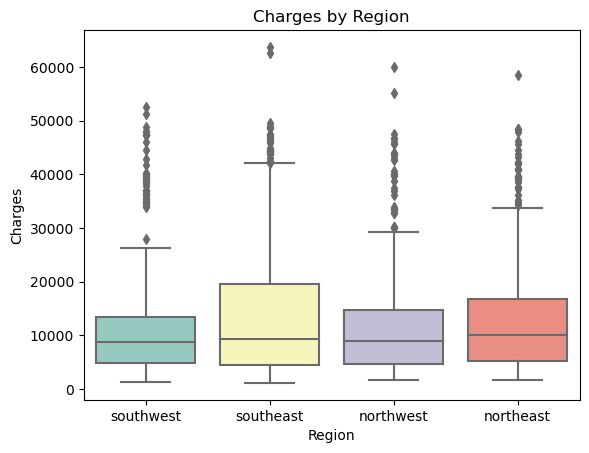

In [10]:
#Box plot of charges by region
sns.boxplot(x='region', y='charges', data=df, palette=sns.color_palette("Set3"))
plt.title("Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

From the box plot of charges by region we can easily see thta region 2 has the highest number of charges. 

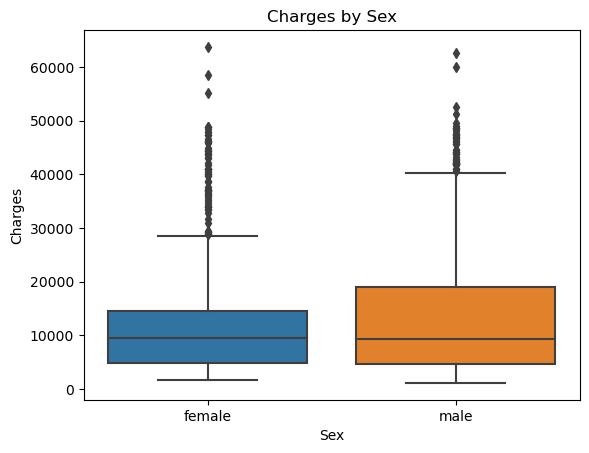

In [11]:
#Box plot of charges by sex
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Sex")
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.show()

From the box plot, we can see that males have the most charges. 

In [12]:
#Creating a list with 2 strings
variables = ['age', 'children']

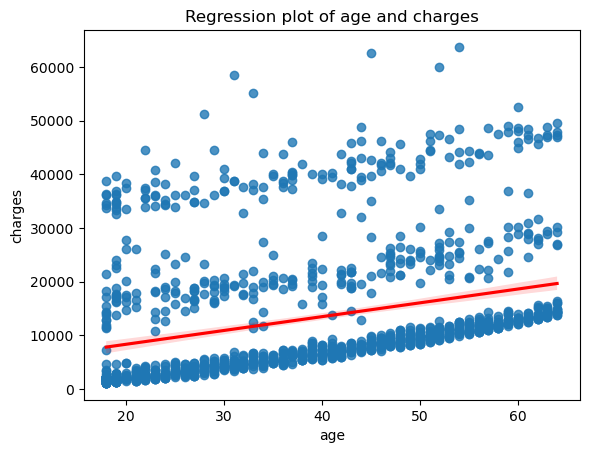

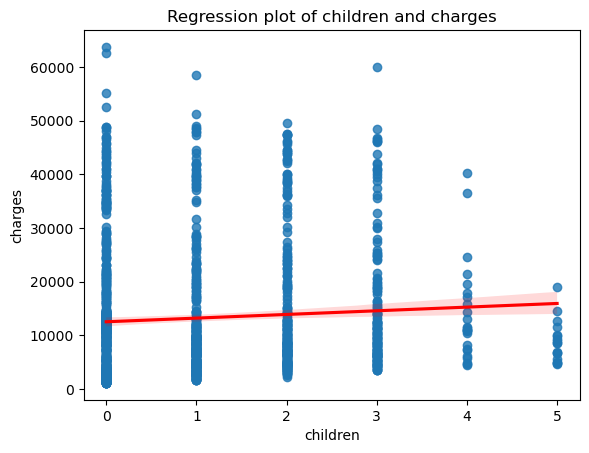

In [13]:
# from the variables list, a scatter plot is created for each variable and the y is consistently 'charges' to check the relationship of each variable against charges.
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='charges', data=df, line_kws={'color': 'red'}).set(title=f'Regression plot of {var} and charges')

We can see that there is a relationship between charges and age, as the age increase the number of charges also increases. The same can be said with children and age, both independent variables have some sort of linear relationship with charges.

<b> Step Five: Importing Label Encoder from sklearn.preprocessing to convert categorical variables into numerical variables. <b>

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le= LabelEncoder()

In [16]:
#Converting all the columns that are categorical into numberical columns. 
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


In [17]:
#Viewing first five rows of data to check if categorical data has been converted to numerical data.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Successfully converted catergorical data to numerical data. 

<b>Step Six: visualising relationships of variables against dependent variable using seaborn (sns). <b>

In [18]:
#Assigning the results of df.corr() to varible corr. 
corr= df.corr()

<Axes: >

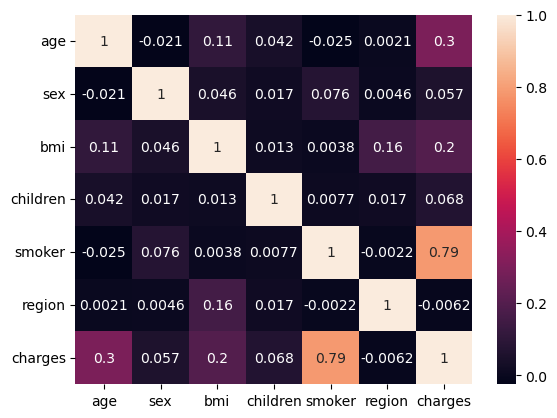

In [19]:
#Visualising correlation matrix and display correlation coefficients in the heatmap.
sns.heatmap(corr, annot= True)

All independent variables besides region have a positive correlation with charges, With smoker having the strongest correlation relationship with charges at 0.79. Whereas region has a negative correlation with charges at -0.0062. The rest of the independent variables have a weaker relationship with charges. 

<b> Step Seven: Train and test data. <b>

In [20]:
# Assign independent (X) and dependent(y) variables
X= df.drop('charges', axis=1)
y= df['charges']

In [21]:
# Importing the scikit-learn function train_test_split, so dataset can can be split for training and testing.
from sklearn.model_selection import train_test_split

In [22]:
# 20% of the data will be used for testing (test_size= 0.2), random state 42 ensures that split is kept consistent each time code is ran
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

<b> Step Eight: Training Linear regression model <b>.

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor= LinearRegression()

In [25]:
#Fitting training dataset to model
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
#Calculating the slope of the model.
regressor.intercept_

-11946.606567263038

In [27]:
#Calculating the coefficient of each X variable.
regressor.coef_

array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04, -2.71284266e+02])

In [28]:
feature_names= X.columns

In [29]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [30]:
model_coeff= regressor.coef_

In [31]:
#Loading feature names and coefficient of each feature in a pandas dataframe for visulisation.
coeff_df= pd.DataFrame(data= model_coeff, index= feature_names, columns=['Coefficient values'])

In [32]:
#Visulaising the coefficient and each feature.
coeff_df

,Coefficient values
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266


In [33]:
#Predicitng dependent variable using X_train.
y_pred= regressor.predict(X_train)

In [34]:
y_pred

array([ 7155.72095161,  8301.24368501,  9225.27847635, ...,
       11397.1643032 , 37231.82236887, 11398.71025918])

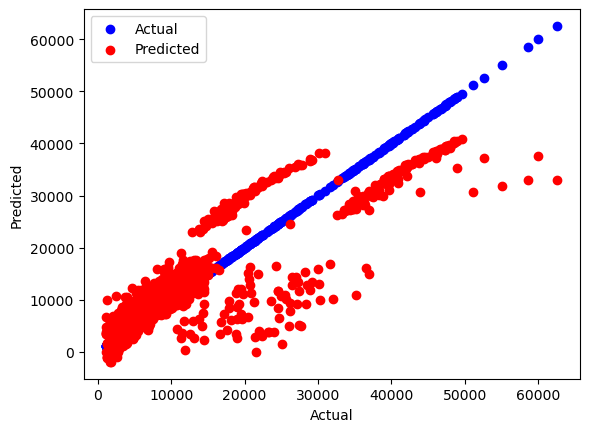

In [35]:
# Plotting  actual values in blue
plt.scatter(y_train, y_train, color='blue', label='Actual')

# Plotting predicted values in red
plt.scatter(y_train, y_pred, color='red', label='Predicted')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()  
plt.show()

From the scatter plot we can see that there is linear relationship between our actual and predicted charges values, however we can also note that there are outliers. 

<b> Step Nine: Evaluation of Model. <b>

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
print("R^2: ", r2_score(y_train, y_pred))
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))

R^2:  0.7417049283233981
MAE:  4208.76202918657
RMSE:  6105.789320191615


The R^2 is defined as the coefficient of determination, in the model, R^2 is 74.17% this shows that 74.17% of the  dependent variation can be accounted for by the independent variables. This model is regarded as having a moderate to good fit. The Mean Absolute Error (MAE) is the difference between the predicted and actual charges, the MAE for this model is 4208.76 which means that the prediction errors are 4208.76 from the actual charges values. The Root Mean Squared Error calculates the difference between predicted charges values and actual charges, however it takes into accounnt the square of the errors which will in turn give more weight to larger errors. The RMSE from this model between predicted and actual charges is 6105.79.  

A few improvements could be made to the model, such as adding more data, perhaps regularizing the model could have also improved the model outcomes as well as removing any outliers in the model. 